In [18]:
#Biblioteczki
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob
from google.colab import files
from IPython.display import clear_output 

In [19]:
# Model sieci neuronowej
LAYERS = [2, 32, 32, 32, 3]
LEARNING_RATE = 0.7

(100, 100, 3)


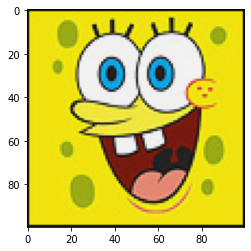

In [20]:
#Pobranie obrazka
#files.upload()
T = (np.array(Image.open("spongebob.jpg"))/255.0)*0.9 + 0.05
H = T.shape[0]
W = T.shape[1]

print(T.shape)
plt.imshow(T)

In [21]:
# Warstwa sieci neuronowej
class Layer():
  def __init__(self, layerSize, inputSize, learningRate = LEARNING_RATE):
    self.W = np.array(np.random.randn(inputSize+1, layerSize)-0.5)
    self.learningRate = learningRate

  def forward(self, X):
    self.X = np.concatenate(([1], X.copy()))
    self.Y = self.activation(np.dot(self.X, self.W))
    return self.Y
  
  def backward(self, E):
    self.E = E.copy()
    self.D = self.E * self.dev(self.Y)
    self.W -= self.learningRate * np.dot(np.transpose([self.X]), [self.D])
    return np.transpose(np.dot(self.W[1:,], np.transpose([self.D])))[0]
  
  def activation(self, X):
    return np.array([1 / (1 + np.exp(-x)) for x in X])

  def dev(self, X):
    return np.array([x * (1-x) for x in X])


In [22]:
# Sieć neuronowa
class NeuralNetwork():
  def __init__(self, layers = LAYERS, learningRate = LEARNING_RATE):
    self.layers = []
    for i in range(1, len(layers)):
      self.layers.append(Layer(layers[i], layers[i-1], learningRate))
  
  def train(self, input, output):
    for layer in self.layers:
      input = layer.forward(input)
    error = input - output
    for layer in self.layers[::-1]:
      error = layer.backward(error)

  def predict(self, input):
    for layer in self.layers:
      input = layer.forward(input)
    return input


In [23]:
# Przeskalowanie współrzędnych piksela z przedziałów [0, H) x [0, W) do przedziałów [-1, 1] x [-1, 1]
def scale(x, y):
  x = (x/H - 0.5) * 2
  y = (y/W - 0.5) * 2
  return np.array([x, y])

In [24]:
#Wyświetlenie nauczonego obrazka
def showLearnedImage():
  L = np.zeros(T.shape)
  for i in range(0, H):
    for j in range(0, W):
      L[i,j] = neuralNetwork.predict(scale(i, j))
  plt.imshow(L)


99.0 %


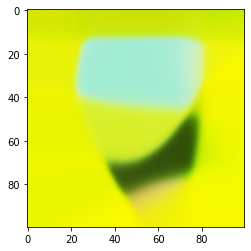

In [25]:
# Uczenie sieci neuronowej (100 000 iteracji)
neuralNetwork = NeuralNetwork()
for t in range(10*W*H):
  if t % 1000 == 0:
    clear_output()
    print(t/1000, "%")
  x = np.random.randint(0, H-1)
  y = np.random.randint(0, W-1)
  neuralNetwork.train(scale(x, y), np.array(T[x][y]))
showLearnedImage()


99.0 %


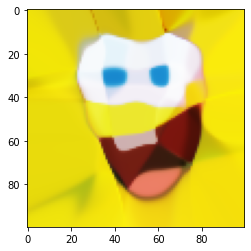

In [26]:
# Uczenie sieci neuronowej (1 000 000 iteracji)
neuralNetwork = NeuralNetwork()
for t in range(100*W*H):
  if t % 10000 == 0:
    clear_output()
    print(t/10000, "%")
  x = np.random.randint(0, H-1)
  y = np.random.randint(0, W-1)
  neuralNetwork.train(scale(x, y), np.array(T[x][y]))
showLearnedImage()


99.0 %


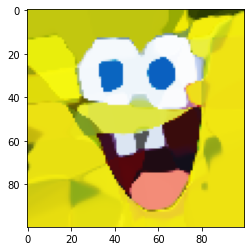

In [27]:
# Uczenie sieci neuronowej (10 000 000 iteracji)
neuralNetwork = NeuralNetwork()
for t in range(1000*W*H):
  if t % 100000 == 0:
    clear_output()
    print(t/100000, "%")
  x = np.random.randint(0, H-1)
  y = np.random.randint(0, W-1)
  neuralNetwork.train(scale(x, y), np.array(T[x][y]))
showLearnedImage()
